In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import categorical_crossentropy, categorical_accuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# Нейронные сети

Нейронные сети - очень широкая тема. В курсе представлен краткий обзор основных подходов и инструментов, которые чаще всего используются на практике.

Будем использовать Keras с бэкендом на tensorflow.

[Тут](https://keras.io/examples/) есть очень много примеров для разных задач.

Также в keras/tf есть возможность самому написать алгоритм обучение и получения предсказания для сети. Этот материал выходит за рамки нашего курса, но при желании можно ознакомиться, например, [здесь](https://keras.io/guides/customizing_what_happens_in_fit/).

## Основы

Единица вычисления в нейросети - нейрон. 

Нейрон принимает на вход вектор, считает взвешенную сумму элементов, применяет функцию активации (например, сигмоидальную, как в логистической регресси) и отдает результат следующему нейрону.

Нейроны обычно организуют в слои. Пример на картинке ниже

![pic](https://drive.google.com/uc?export=view&id=1iVfZSWU1qjIZOFZpR33YoJ6w-0pBFMUj)

В любой нейросети есть входной, скрытый и выходной слой. Скрытых слоев может быть очень много.

Каждая связь описывается весом. Переход от одного слоя к другому происходит через умножение матриц и применение функции активации к результату.

Если мы хотим получить прогноз по вектору значений, то мы последовательно проводим вектор через все слои и на выходе получаем нужное значение.

Процесс подбора параметров - обучение нейросети.

Для обучения сети обычно применяют метод обратного распространения ошибки. Основная идея в том, что мы движемся от последнего слоя к первому и изменяем веса каждого слоя так, чтобы общая ошибка уменьшилась.

## Функции активации

Обычно используют следующие функции активации:

- сигмоидальную (как в логистической регрессии)
- гиперболический тангенс
- ReLU
- линейная функция
- пороговая функция

## Как проходит обучение

Допустим, у нас было 10к фотографий.

Данные делят на тренировочную и тестовую выборку. Для обучения используют тренировочную выборку, а тестовую выборку откладывают. Мы взяли для обучения 8к фотографий и отложили оставшиеся 2к.

Тренировочную выборку делят на батчи (например, по 10 записей) и для каждого батча запускают алгоритм оптимизации (например, SGD). Таким образом, мы разбиваем данные на 800 кусочков и столько раз прогоняем SGD. Это называется эпохой обучения. Чтобы посчитать ошибку используют лосс-функцию. Для задач классификации обычно используют [кросс-энтропию](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D1%91%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F).

Затем мы можем по-другому разбить на батчи и запустить новую эпоху обучения.

Изменения весов, полученные от разных батчей, можно считать параллельно, поэтому обучение на GPU проходит гораздо быстрее, чем обучение на CPU.

Прочитаем данные, разобьем на треин и тест, построим модель

In [ ]:
df = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.iloc[:, 1:]
X = X / X.max().max()
y = to_categorical(df.iloc[:, 0], num_classes=10)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

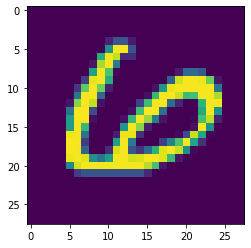

In [ ]:
plt.imshow(X.iloc[0].values.reshape(28, 28))

Построим многослойный перцептрон. Оптимизировать будем при помощи SGD, в качестве лосс-функции будем использовать кроссэнтропию, также будем считать accuracy

In [ ]:
model = Sequential(
    [
     Dense(16, input_shape=(X.shape[1],), activation='sigmoid'),
     Dense(16, activation='relu'),
     Dense(10, activation='softmax')
    ]
)
model.compile(optimizer=SGD(clipnorm=1), loss=categorical_crossentropy, metrics=[categorical_accuracy])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Гиперпараметры сети

- архитектура сети
- параметры оптимизатора (learning rate и др.)
- регуляризация
- размер батча
- количество эпох

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
1350/1350 [==============================] - 3s 2ms/step - loss: 1.9454 - categorical_accuracy: 0.4141 - val_loss: 1.5128 - val_categorical_accuracy: 0.6020
Epoch 2/10
1350/1350 [==============================] - 2s 2ms/step - loss: 1.0877 - categorical_accuracy: 0.7315 - val_loss: 0.8095 - val_categorical_accuracy: 0.7993
Epoch 3/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.6513 - categorical_accuracy: 0.8319 - val_loss: 0.5906 - val_categorical_accuracy: 0.8353
Epoch 4/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.5180 - categorical_accuracy: 0.8568 - val_loss: 0.5211 - val_categorical_accuracy: 0.8453
Epoch 5/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.4609 - categorical_accuracy: 0.8683 - val_loss: 0.4835 - val_categorical_accuracy: 0.8593
Epoch 6/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.4243 - categorical_accuracy: 0.8790 - val_loss: 0.4546 - val_categorical_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

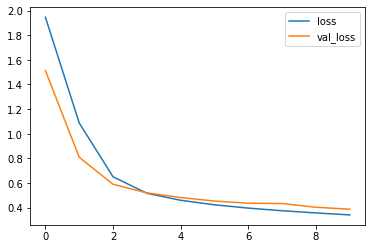

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [ ]:
model.evaluate(x_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.3732 - categorical_accuracy: 0.8912


[0.37324005365371704, 0.8912000060081482]

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[464,   0,   5,   4,   0,   9,   6,   0,   3,   0],
       [  0, 539,   2,   3,   1,   0,   1,   1,   9,   1],
       [ 10,   9, 461,  14,   4,   4,  12,   6,  11,   1],
       [  2,   3,  14, 450,   0,  17,   2,   6,  15,   2],
       [  2,   2,   4,   0, 394,   0,  13,   0,   5,  56],
       [  5,   4,   7,  25,   6, 351,  12,   2,  24,   7],
       [  3,   1,  11,   0,   4,   6, 453,   0,   3,   0],
       [  1,   2,  12,   3,   5,   0,   0, 487,   0,  18],
       [  1,  18,   8,  12,   4,  17,   0,   1, 415,   8],
       [  3,   3,   4,   8,  18,   3,   0,  11,   5, 442]])

Как оценим качество такой модели? Какое качество давала обычная логистическая регрессия?

## Задача

Добавить больше нейронов к существующим слоям, а также добавить новый слой в нейросеть. Измерить качество.

In [ ]:
# Ваш код здесь


## Задача

Попробовать оптимизатор Adam вместо SGD, сравнить качество (не забываем передавать параметр `clipnorm=1`)

In [ ]:
from tensorflow.keras.optimizers import Adam
# Ваш код здесь


## Уменьшение learning rate

[Документация по ExponentialDecay](https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/)

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

model = Sequential(
    [
     Dense(16, input_shape=(X.shape[1],), activation='sigmoid'),
     Dense(16, activation='relu'),
     Dense(10, activation='softmax')
    ]
)
model.compile(optimizer=SGD(clipnorm=1, learning_rate=lr_schedule), loss=categorical_crossentropy, metrics=[categorical_accuracy])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7112 - categorical_accuracy: 0.7781
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3461 - categorical_accuracy: 0.8977
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2858 - categorical_accuracy: 0.9169


## Задача

Использовать ExponentialDecay для оптимизатора Adam

In [ ]:
## Ваш код здесь

## Регуляризация

Для того, чтобы избежать переобучения, мы можем использовать регуляризацию. Для линейных моделей мы использовали L1 и L2 регуляризацию. Для нейросетей обычно используют dropout слой.

Интуиция, которая лежит за dropout-слоем состоит в том, что нам не хочется, чтобы модель обучалась по какому-то одному признаку, поэтому мы хотим периодически "отключать" какие-то связи в слое и смотреть как это влияет на прогноз модели.

Dropout слой ровно это и делает. Мы можем задать вероятность отключения признака и нейросеть присвоит весу этого признака значение 0. Так как при обучении мы много раз проходим через нейросеть, то мы избежим переобучения.

Dropout используется только при обучении, при получении прогноза никакие веса не обнуляются.

При этом обучение будет идти быстрее, но сходиться будет медленнее (потребуется больше эпох, чтобы получить такой же результат)

Чем больше параметров в слое, тем эффективнее будет dropout

## Задача

Применить Dropout к полученной выше нейросети к одному из слоев. Сравнить результат.

In [ ]:
# Ваш код здесь

## Сверточные нейронные сети

Обучая многослойный перцептрон можно аппроксимировать любую функцию, но для некоторых задач проще использовать другую архитектуру сети. Например, для задач с аудио и картинками хорошо подходит сверточная нейронная сеть (CNN).

![pic](https://drive.google.com/uc?export=view&id=1CgvgrVTOdvsT4LzltnayZ0SxPuUyMEpJ)

Сверточная нейронная сеть состоит, как правило, из двух слоев - свертка и пулинг.

Свертка получается, когда по исходному изображению проходит скользящее окно в виде квадратной матрицы. На каждом шаге происходит покомпонентное умножение матриц (исходного изображения и ядра - квадратной матрицы). Дальше результат суммируется и записывается в новую матрицу. После чего вся новая матрица проходит через функцию активации (обычно relu).

После свертки применяется пулинг. Матрица делится на квадратики (пулы), и в каждом квадратике выбирается наибольшее значение. В конце применяется функция активации.

![pic](https://drive.google.com/uc?export=view&id=1esI1fEimHm7EPe-c7c82knkofwyDxflY)

Во время обучения подбираются коэфициенты ядра. Как правило, на каждом слое обучают несколько фильтров.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Приводим изображения к размерности (28, 28, 1), потому что картинка черно-белая 28х28

In [ ]:
X_images = X.values.reshape(-1, 28, 28, 1)
x_train, x_test, y_train, y_test = train_test_split(X_images, y)
x_train.shape

(15000, 28, 28, 1)

In [ ]:
model = Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
106/106 [==============================] - 11s 96ms/step - loss: 0.8946 - accuracy: 0.7267 - val_loss: 0.2560 - val_accuracy: 0.9300
Epoch 2/5
106/106 [==============================] - 10s 93ms/step - loss: 0.2553 - accuracy: 0.9241 - val_loss: 0.1512 - val_accuracy: 0.9533
Epoch 3/5
106/106 [==============================] - 10s 93ms/step - loss: 0.1734 - accuracy: 0.9481 - val_loss: 0.1125 - val_accuracy: 0.9700
Epoch 4/5
106/106 [==============================] - 10s 93ms/step - loss: 0.1332 - accuracy: 0.9590 - val_loss: 0.0934 - val_accuracy: 0.9720
Epoch 5/5
106/106 [==============================] - 10s 93ms/step - loss: 0.1104 - accuracy: 0.9652 - val_loss: 0.0842 - val_accuracy: 0.9747


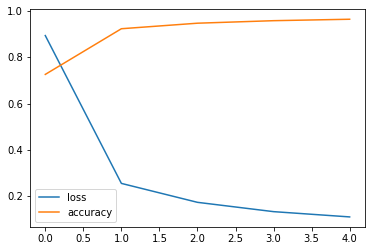

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])

In [ ]:
model.evaluate(x_test, y_test)

157/157 [==============================] - 1s 9ms/step - loss: 0.0923 - accuracy: 0.9720


[0.09234489500522614, 0.972000002861023]

## Задача

Взять данные с Kaggle по датасету [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv).

В датасете представлены картинки одежды, нужно построить классификатор, который определит, что находится на картинке.

Обучить на этих данных сверточную нейронную сеть. Можно использовать архитектуру из примера выше, можно ее усложнить.

Оценить качество модели.

## Задача

По этим же данным построить модель логистической регрессии. Сравнить результаты.

## Домашнее задание

Будем работать с датасетом о рыбах https://www.kaggle.com/crowww/a-large-scale-fish-dataset

## Easy

В этой задаче возьмем любые два вида рыб и решим задачу бинарной классификации.

Нужно прочитать данные, разбить на треин и тест, построить модель сверточной нейросети, проверить качество.

## Normal

Берем данные о всех рыбах и решаем ту же задачу.

## Hard

Добавим к модели из Normal аугментацию данных. 

Аугментация данных - это прием, при помощи которого мы можем искусственно увеличить количество данных, которые у нас имеются. Например, если речь идет о картинках, то мы можем проводить разные трансформации (поворачивать, разворачивать, сжимать, менять освещение) над картинками и использовать эти данные для обучения.

В keras это делается при помощи `DataImageGenerator`. Прочитать подробнее можно [тут](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/).



## Полезные ссылки

- [Как сверточные сети видят мир](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)
- [Еще про сверточные сети](https://habr.com/ru/post/348000/)